In [130]:
import requests
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import io

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Community district information

In [3]:
cb_shpfile = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/yfnk-k7r4?method=export&format=Shapefile')

In [4]:
cb_shpfile.head()

,boro_cd,shape_area,shape_leng,geometry
0,404.0,6.573966e+07,37018.373862,"POLYGON ((-73.84751 40.73901, -73.84801 40.738..."
1,304.0,5.666261e+07,37007.806528,"POLYGON ((-73.89647 40.68234, -73.89653 40.682..."
2,303.0,7.946150e+07,36213.671066,"POLYGON ((-73.91805 40.68721, -73.91800 40.686..."
3,308.0,4.560379e+07,38232.887088,"POLYGON ((-73.95829 40.67983, -73.95596 40.679..."
4,112.0,7.796454e+07,54703.224746,"POLYGON ((-73.93445 40.83598, -73.93464 40.836..."


/usr/local/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


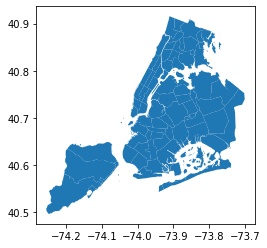

In [5]:
cb_shpfile.plot()

In [7]:
cb_list_from_api = requests.get('https://data.cityofnewyork.us/resource/ruf7-3wgc.csv')

In [56]:
cb_list = pd.read_csv(io.BytesIO(cb_list_from_api.content), sep=",")

In [57]:
cb_list.head()

,borough,community_board,neighborhoods,cb_office_address,cb_address_line_2,cb_office_phone,cb_office_fax,cb_office_email,cb_website,cb_chair,cb_district_manager,cb_board_meeting,cb_cabinet_meeting,cb_precinct_s,cb_precinct_phone_s,latitude,longitude,community_board_1,council_district,bin,bbl,census_tract,nta,postcode,locationpoint
0,Bronx,Community Board 1,"Mott Haven, Port Morris, and Melrose","3024 3rd Ave. Bronx, NY 10455",NaN,(718) 585-7117,(718) 292-0558,brxcb1@optonline.net,https://www1.nyc.gov/site/bronxcb1/index.page,Arline Parks,Vacant,"Last Thursday, 6:00pm","Second Tuesday, 10:00am",40,(718) 402-2270,40.819717,-73.913373,201,17,2117395.0,2.023630e+09,71,Melrose South-Mott Haven North,10455,POINT (-73.913373 40.819717)
1,Bronx,Community Board 6,"Belmont, Bathgate, West Farms, and E Tremont","1932 Arthur Avenue, Rm. 403-A Bronx, NY 10457",NaN,(718) 579-6990,(718) 579-6875,bronxcb6@bronxcb6.org,http://bronxcb6.org/,Evonne Capers,Vacant,"Second Wednesday, 6:30pm","Last Thursday, 1:00pm",48,(718) 299-3900,40.845685,-73.893294,206,17,2009911.0,2.029470e+09,36901,East Tremont,10457,POINT (-73.893294 40.845685)
2,Bronx,Community Board 11,"Morris Park, Pelham Parkway, Pelham Gardens, A...","1741 Colden Ave Bronx, NY 10462",NaN,(718) 892-6262,NaN,NaN,https://www1.nyc.gov/site/bronxcb11/index.page,Al D’Angelo,Jeremy Warneke,"Fourth Thursday, 7:00pm","Second Thursday, 1:00pm",49,(718) 918-2000,40.847348,-73.855711,211,13,2044747.0,2.041010e+09,252,Van Nest-Morris Park-Westchester Square,10462,POINT (-73.855711 40.847348)
3,Staten Island,Community Board 1,"Arlington, Castleton Corners, Clifton, Concord...","1 Edgewater Plaza Staten Island, NY 10305",Room 217,718-981-6900,(718) 720-1342,sicb1@si.rr.com,http://www.nyc.gov/sicb1,Nicholas Siclari,Joseph Carroll,"Second Tuesday, 8:00pm",NaN,"120, 121",120 - (718) 876-8500 121 - (718) 697-8700,40.619035,-74.068717,501,49,5107415.0,5.028200e+09,6,Stapleton-Rosebank,10305,POINT (-74.068717 40.619035)
4,Queens,Community Board 1,"Astoria, Old Astoria, Long Island City, Queens...","45-02 Ditmars Blvd., Astoria",NaN,(718) 626-1021,(718) 626-1072,qn01@cb.nyc.gov,https://www1.nyc.gov/site/queenscb1/index.page,Marie Torniali,Florence Koulouris,"Third Tuesday, 6:30 PM","Second Thursday, 9:30 AM",114,(718) 626-9311,40.770738,-73.903082,401,22,4014554.0,4.007698e+09,137,Steinway,11105,POINT (-73.903082 40.770738)


In [58]:
cb_list['community_board'].str[len('Community Board '):].head()

0     1
1     6
2    11
3     1
4     1
Name: community_board, dtype: object

In [59]:
# only choose relevant columns for joining
cb_list['cb_index'] = cb_list['community_board_1']
cb_list['community_board'] = cb_list['community_board'].str[len('Community Board '):].astype(int)
cb_list = cb_list[['borough', 'community_board', 'cb_index']]

In [60]:
print(cb_list.head())
print()
print(len(cb_list))

         borough  community_board  cb_index
0          Bronx                1       201
1          Bronx                6       206
2          Bronx               11       211
3  Staten Island                1       501
4         Queens                1       401

59


# Income by community district

- Retrieve ACS data by community district
- Select the column corresponding to median household income
- Use the community district boundaries to map the data


In [41]:
income_by_cd = pd.read_csv('../../../data/cleaned_Median_household_income_by_cd.csv')

In [42]:
income_by_cd

,GeogName,GeoID,Borough,Median Household Income
0,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),BK01,Brooklyn,"78,843"
1,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,BK02,Brooklyn,"112,437"
2,BK03 Bedford-Stuyvesant (CD 3 Approximation),BK03,Brooklyn,"63,177"
3,BK04 Bushwick (CD 4 Equivalent),BK04,Brooklyn,"61,436"
4,BK05 East New York-Cypress Hills (CD 5 Approxi...,BK05,Brooklyn,"41,638"
5,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,BK06,Brooklyn,"133,136"
6,BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,BK07,Brooklyn,"74,411"
7,BK08 Crown Heights (North) (CD 8 Approximation),BK08,Brooklyn,"67,479"
8,BK09 Crown Heights (South) (CD 9 Approximation),BK09,Brooklyn,"59,924"
9,BK10 Bay Ridge-Dyker Heights (CD 10 Approximat...,BK10,Brooklyn,"74,062"


In [51]:
income_by_cd['community_board'] = income_by_cd['GeoID'].str[2:].astype(int)
income_by_cd = income_by_cd[['Borough','community_board', 'Median Household Income']]

In [52]:
income_by_cd

,Borough,community_board,Median Household Income
0,Brooklyn,1,"78,843"
1,Brooklyn,2,"112,437"
2,Brooklyn,3,"63,177"
3,Brooklyn,4,"61,436"
4,Brooklyn,5,"41,638"
5,Brooklyn,6,"133,136"
6,Brooklyn,7,"74,411"
7,Brooklyn,8,"67,479"
8,Brooklyn,9,"59,924"
9,Brooklyn,10,"74,062"


# Housing units built by community district and year

In [47]:
housing_units_by_cd = pd.read_csv('../../../data/cleaned_housing_units_built_by_community_district.csv')

In [48]:
housing_units_by_cd

,commntydst,completedUnits
0,404,2583
1,304,7445
2,303,9430
3,308,5102
4,316,4133
5,317,3710
6,226,0
7,112,670
8,108,987
9,164,0


# Affordable housing units built by community district and year

In [83]:
affordable_units_by_cd = pd.read_csv('../../../data/cleaned_Affordable_Housing_Production_by_cd.csv')

In [84]:
affordable_units_by_cd['affordable_units'] = affordable_units_by_cd['Sum']
affordable_units_by_cd = affordable_units_by_cd.drop(columns=['Sum'])

In [88]:
affordable_units_by_cd

,Borough,Community district,affordable_units
0,Bronx,1,4042
1,Bronx,2,3063
2,Bronx,3,4880
3,Bronx,4,5038
4,Bronx,5,3477
5,Bronx,6,4775
6,Bronx,7,4091
7,Bronx,8,288
8,Bronx,9,4495
9,Bronx,10,95


# Compare datasets

In [67]:
merged_income =\
pd.merge(cb_list, income_by_cd, left_on=['borough', 'community_board'], right_on=['Borough', 'community_board'])

In [68]:
merged_income.head()

,borough,community_board,cb_index,Borough,Median Household Income
0,Bronx,1,201,Bronx,"26,166"
1,Bronx,6,206,Bronx,"26,473"
2,Bronx,11,211,Bronx,"56,921"
3,Staten Island,1,501,Staten Island,"73,974"
4,Queens,1,401,Queens,"74,900"


In [66]:
housing_units_by_cd.head()

,commntydst,completedUnits
0,404,2583
1,304,7445
2,303,9430
3,308,5102
4,316,4133


In [70]:
merged_income_units =\
pd.merge(merged_income, housing_units_by_cd, left_on='cb_index', right_on='commntydst')

In [72]:
merged_income_units.head()

,borough,community_board,cb_index,Borough,Median Household Income,commntydst,completedUnits
0,Bronx,1,201,Bronx,"26,166",201,7601
1,Bronx,6,206,Bronx,"26,473",206,4938
2,Bronx,11,211,Bronx,"56,921",211,667
3,Staten Island,1,501,Staten Island,"73,974",501,2286
4,Queens,1,401,Queens,"74,900",401,11014


In [74]:
affordable_units_by_cd.head()

,Borough,Community district,Sum
0,Bronx,1,4042
1,Bronx,2,3063
2,Bronx,3,4880
3,Bronx,4,5038
4,Bronx,5,3477


In [89]:
merged_income_units_affordable =\
pd.merge(merged_income_units, affordable_units_by_cd, left_on=['Borough', 'community_board'], right_on=['Borough', 'Community district'])

In [90]:
merged_income_units_affordable.head()

,borough,community_board,cb_index,Borough,Median Household Income,commntydst,completedUnits,Community district,affordable_units
0,Bronx,1,201,Bronx,"26,166",201,7601,1,4042
1,Bronx,6,206,Bronx,"26,473",206,4938,6,4775
2,Bronx,11,211,Bronx,"56,921",211,667,11,91
3,Staten Island,1,501,Staten Island,"73,974",501,2286,1,2016
4,Queens,1,401,Queens,"74,900",401,11014,1,831


In [108]:
merged_data = merged_income_units_affordable[['borough', 'community_board', 'cb_index', 'Median Household Income', 'completedUnits', 'affordable_units']]

In [110]:
income_ints = merged_data['Median Household Income'].str.replace(',', '').astype(int)
merged_data['Median Household Income'] = income_ints

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [112]:
print(min(merged_data['Median Household Income']))
print(max(merged_data['Median Household Income']))

26166
192293


In [124]:
def borough_to_color(borough):
    if (borough=='Bronx'):
        return 'blue'
    elif (borough=='Brooklyn'):
        return 'green'
    elif (borough=='Manhattan'):
        return 'orange'
    elif (borough=='Queens'):
        return 'purple'
    else:
        return 'red'

In [163]:
borough_colors = merged_data['borough'].map(borough_to_color)

blue_patch = mpatches.Patch(color='blue', label='Bronx')
green_patch = mpatches.Patch(color='green', label='Brooklyn')
orange_patch = mpatches.Patch(color='orange', label='Manhattan')
purple_patch = mpatches.Patch(color='purple', label='Queens')
red_patch = mpatches.Patch(color='red', label='Staten Island')

colors_arr = [blue_patch, green_patch, orange_patch, purple_patch, red_patch]

In [142]:
merged_data[['Median Household Income', 'completedUnits', 'affordable_units']].corr()

,Median Household Income,completedUnits,affordable_units
Median Household Income,1.000000,0.137192,-0.352452
completedUnits,0.137192,1.000000,0.326678
affordable_units,-0.352452,0.326678,1.000000


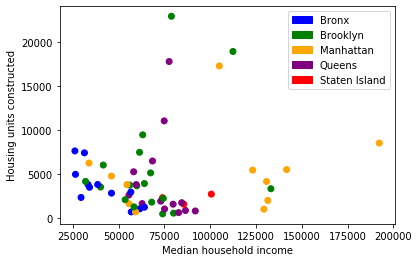

In [164]:
fig, ax = plt.subplots()

ax.legend(handles=colors_arr)
ax.scatter(merged_data['Median Household Income'], merged_data['completedUnits'], c=borough_colors)

ax.set_xlabel('Median household income')
ax.set_ylabel('Housing units constructed')

plt.show()

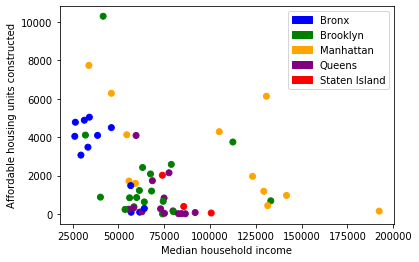

In [165]:
fig, ax = plt.subplots()

ax.legend(handles=colors_arr)
ax.scatter(merged_data['Median Household Income'], merged_data['affordable_units'], c=borough_colors)

ax.set_xlabel('Median household income')
ax.set_ylabel('Affordable housing units constructed')

plt.show()

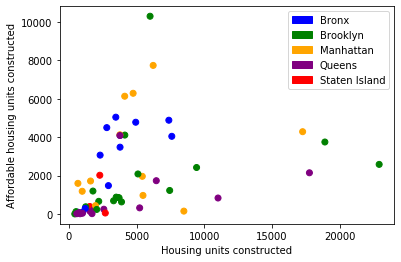

In [166]:
fig, ax = plt.subplots()

ax.legend(handles=colors_arr)
ax.scatter(merged_data['completedUnits'], merged_data['affordable_units'], c=borough_colors)

ax.set_xlabel('Housing units constructed')
ax.set_ylabel('Affordable housing units constructed')

plt.show()

# Adjust for land area and population

## Land area

In [147]:
cb_shpfile['boro_cd'] = cb_shpfile['boro_cd'].astype(int)

In [153]:
# Shape area units are meaningless but it's proportional to land area
merged_data_area = (pd.merge(merged_data, cb_shpfile[['boro_cd', 'shape_area']], left_on='cb_index', right_on='boro_cd')).drop(columns=['boro_cd'])

In [154]:
merged_data_area.head()

,borough,community_board,cb_index,Median Household Income,completedUnits,affordable_units,shape_area
0,Bronx,1,201,26166,7601,4042,6.040003e+07
1,Bronx,6,206,26473,4938,4775,4.266432e+07
2,Bronx,11,211,56921,667,91,1.003145e+08
3,Staten Island,1,501,73974,2286,2016,3.772325e+08
4,Queens,1,401,74900,11014,831,1.714928e+08


In [159]:
# arbitrarily multiply by 1000 so the numbers are easier to work with
merged_data_area['completedUnitsByArea'] = merged_data_area['completedUnits'] * 1000 / merged_data_area['shape_area']
merged_data_area['affordableUnitsByArea'] = merged_data_area['affordable_units'] * 1000 / merged_data_area['shape_area']

In [160]:
merged_data_area.head()

,borough,community_board,cb_index,Median Household Income,completedUnits,affordable_units,shape_area,completedUnitsByArea,affordableUnitsByArea
0,Bronx,1,201,26166,7601,4042,6.040003e+07,0.125844,0.066920
1,Bronx,6,206,26473,4938,4775,4.266432e+07,0.115741,0.111920
2,Bronx,11,211,56921,667,91,1.003145e+08,0.006649,0.000907
3,Staten Island,1,501,73974,2286,2016,3.772325e+08,0.006060,0.005344
4,Queens,1,401,74900,11014,831,1.714928e+08,0.064224,0.004846


In [162]:
merged_data_area[['Median Household Income', 'completedUnitsByArea', 'affordableUnitsByArea']].corr()

,Median Household Income,completedUnitsByArea,affordableUnitsByArea
Median Household Income,1.000000,0.217667,-0.272763
completedUnitsByArea,0.217667,1.000000,0.509093
affordableUnitsByArea,-0.272763,0.509093,1.000000


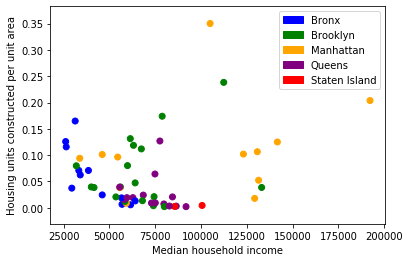

In [167]:
fig, ax = plt.subplots()

ax.legend(handles=colors_arr)
ax.scatter(merged_data_area['Median Household Income'], merged_data_area['completedUnitsByArea'], c=borough_colors)

ax.set_xlabel('Median household income')
ax.set_ylabel('Housing units constructed per unit area')

plt.show()

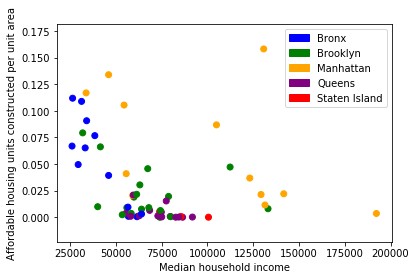

In [171]:
fig, ax = plt.subplots()

ax.legend(handles=colors_arr)
ax.scatter(merged_data_area['Median Household Income'], merged_data_area['affordableUnitsByArea'], c=borough_colors)

ax.set_xlabel('Median household income')
ax.set_ylabel('Affordable housing units constructed per unit area')

plt.show()

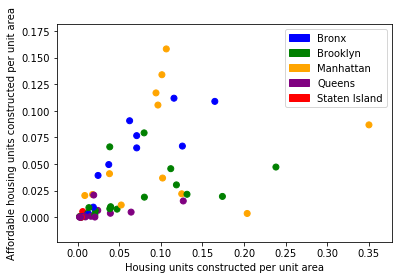

In [170]:
fig, ax = plt.subplots()

ax.legend(handles=colors_arr)
ax.scatter(merged_data_area['completedUnitsByArea'], merged_data_area['affordableUnitsByArea'], c=borough_colors)

ax.set_xlabel('Housing units constructed per unit area')
ax.set_ylabel('Affordable housing units constructed per unit area')

plt.show()

## Population

In [174]:
cd_populations_from_api = requests.get('https://data.cityofnewyork.us/resource/xi7c-iiu2.csv')

In [176]:
cd_populations = pd.read_csv(io.BytesIO(cd_populations_from_api.content), sep=",")

In [177]:
cd_populations

,borough,cd_number,cd_name,_1970_population,_1980_population,_1990_population,_2000_population,_2010_population
0,Bronx,1,"Melrose, Mott Haven, Port Morris",138557,78441,77214,82159,91497
1,Bronx,2,"Hunts Point, Longwood",99493,34399,39443,46824,52246
2,Bronx,3,"Morrisania, Crotona Park East",150636,53635,57162,68574,79762
3,Bronx,4,"Highbridge, Concourse Village",144207,114312,119962,139563,146441
4,Bronx,5,"University Hts., Fordham, Mt. Hope",121807,107995,118435,128313,128200
5,Bronx,6,"East Tremont, Belmont",114137,65016,68061,75688,83268
6,Bronx,7,"Bedford Park, Norwood, Fordham",113764,116827,128588,141411,139286
7,Bronx,8,"Riverdale, Kingsbridge, Marble Hill",103543,98275,97030,101332,101731
8,Bronx,9,"Soundview, Parkchester",166442,167627,155970,167859,172298
9,Bronx,10,"Throgs Nk., Co-op City, Pelham Bay",84948,106516,108093,115948,120392


This dataset doesn't have 2020 populations, but 2010 populations may be better because they allow us to weigh construction amounts by the pre-construction population.

In [178]:
cd_populations = cd_populations[['borough', 'cd_number', '_2010_population']]

In [182]:
merged_data_populations = (pd.merge(merged_data, cd_populations, left_on=['borough', 'community_board'], right_on=['borough', 'cd_number'])).drop(columns=['cd_number'])

In [183]:
# again arbitrarily multiply by 1000 so the numbers are easier to work with
merged_data_populations['completedUnitsByPopulation'] = merged_data_populations['completedUnits'] * 1000 / merged_data_populations['_2010_population']
merged_data_populations['affordableUnitsByPopulation'] = merged_data_populations['affordable_units'] * 1000 / merged_data_populations['_2010_population']


In [185]:
merged_data_populations[['Median Household Income', 'completedUnitsByPopulation', 'affordableUnitsByPopulation']].corr()

,Median Household Income,completedUnitsByPopulation,affordableUnitsByPopulation
Median Household Income,1.000000,0.251561,-0.387552
completedUnitsByPopulation,0.251561,1.000000,0.415372
affordableUnitsByPopulation,-0.387552,0.415372,1.000000


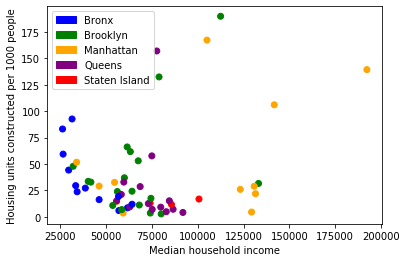

In [186]:
fig, ax = plt.subplots()

ax.legend(handles=colors_arr)
ax.scatter(merged_data_populations['Median Household Income'], merged_data_populations['completedUnitsByPopulation'], c=borough_colors)

ax.set_xlabel('Median household income')
ax.set_ylabel('Housing units constructed per 1000 people')

plt.show()

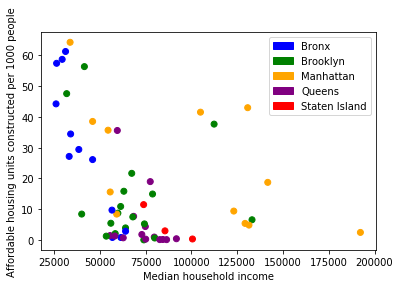

In [187]:
fig, ax = plt.subplots()

ax.legend(handles=colors_arr)
ax.scatter(merged_data_populations['Median Household Income'], merged_data_populations['affordableUnitsByPopulation'], c=borough_colors)

ax.set_xlabel('Median household income')
ax.set_ylabel('Affordable housing units constructed per 1000 people')

plt.show()

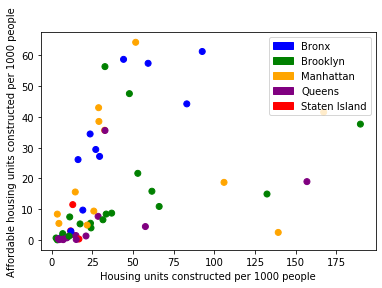

In [188]:
fig, ax = plt.subplots()

ax.legend(handles=colors_arr)
ax.scatter(merged_data_populations['completedUnitsByPopulation'], merged_data_populations['affordableUnitsByPopulation'], c=borough_colors)

ax.set_xlabel('Housing units constructed per 1000 people')
ax.set_ylabel('Affordable housing units constructed per 1000 people')

plt.show()